In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
%matplotlib inline

In [10]:
#Read in the dataset of reviews from Wine Enthusisast
wine_scores = pd.read_csv('../data/winemag-data-130k-v2.csv')

In [11]:
wine_scores.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [12]:
# encode the column names

#country column
wine_scores["country"] = wine_scores["country"].astype('category')
wine_scores.dtypes

#variety column
wine_scores["variety"] = wine_scores["variety"].astype('category')


In [13]:
#assign encoded label to new column
wine_scores["country code"] = wine_scores["country"].cat.codes
# wine_scores.head()

wine_scores["varietal code"] = wine_scores["variety"].cat.codes
wine_scores.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,country code,varietal code
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,22,690
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,31,450
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,40,436
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,40,479
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,40,440


In [14]:
#create a range for Classic, Superb, Excellent, Very good, Good and Acceptable Wines
# classic = (wine_scores['points'] >=98)

# for x in wine_scores['points']:
# #     if classic:
#         print(x)

In [15]:
#Convert Country column to boolean values

wine_scores['US'] = np.where(wine_scores['country'] == 'US', True, False)

wine_scores['US']

0         False
1         False
2          True
3          True
4          True
          ...  
129966    False
129967     True
129968    False
129969    False
129970    False
Name: US, Length: 129971, dtype: bool

In [16]:
#Convert Country column to integers
convert = wine_scores['US'].astype(int)
wine_scores['US'] = convert
print(wine_scores['US'])

0         0
1         0
2         1
3         1
4         1
         ..
129966    0
129967    1
129968    0
129969    0
129970    0
Name: US, Length: 129971, dtype: int32


In [17]:
# creating new column in dataframe

wine_scores['vintage'] = 0 

# using regex to extract year of vintage
wine_scores["vintage"] = wine_scores["title"].str.extract("(\d{4})", expand=True)

#convert strings into integers
wine_scores["vintage"] = (wine_scores.vintage).apply(lambda x: float(x))

In [18]:
wine_scores["vintage"]

0         2013.0
1         2011.0
2         2013.0
3         2013.0
4         2012.0
           ...  
129966    2013.0
129967    2004.0
129968    2013.0
129969    2012.0
129970    2012.0
Name: vintage, Length: 129971, dtype: float64

In [19]:
#Displays a heatmap showing distribution of null values
# sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')
wine_scores.head()
print("# of NaN in every column\n", wine_scores.isnull().sum(axis = 0))


# of NaN in every column
 Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
country code                 0
varietal code                0
US                           0
vintage                   4609
dtype: int64


In [20]:
#Fill in null values for price

#Calculate average price
wine_scores['price'].mean()
avg_price=35.36

#create function to impute average price into 'price' column
# @staticmethod
def impute_price(cols):
    Price = cols
        
    if pd.isna(Price):
        return avg_price
    else:
        return Price
    

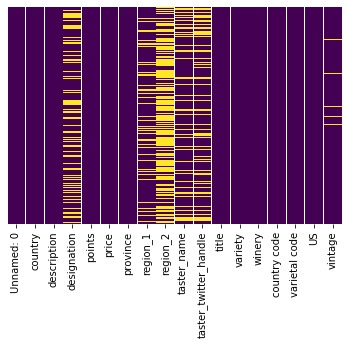

In [21]:
wine_scores['price'] = wine_scores['price'].apply(impute_price)

#display new heatmap with filled in prices
sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#Fill in null values for vintage

#Calculate average price
wine_scores['vintage'].mean()
avg_year=2011

#create function to impute average price into 'price' column
# @staticmethod
def impute_vintage(cols):
    vintage = cols
        
    if pd.isna(vintage):
        return avg_year
    else:
        return vintage

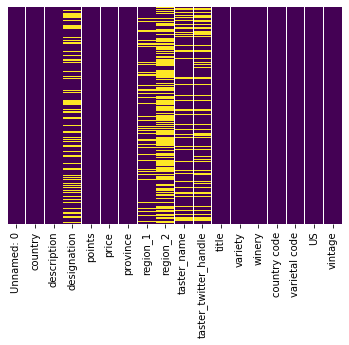

In [23]:
wine_scores['vintage'] = wine_scores['vintage'].apply(impute_vintage)

#display new heatmap with filled in prices
sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
#Drop Columns with too much missing data
wine_scores= wine_scores.drop(['Unnamed: 0'],axis=1)

In [25]:
#Drop NA volues from vintage column
wine_scores 

#display new heatmap 
# sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,country code,varietal code,US,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.36,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,22,690,0,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.00,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,31,450,0,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.00,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,40,436,1,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.00,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,40,479,1,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.00,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,40,440,1,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.00,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),17,479,0,2013.0
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.00,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,40,440,1,2004.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.00,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,15,209,0,2013.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.00,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,15,436,0,2012.0


In [26]:
#display the relationship country and wine score

# plt.figure(figsize=(60,7))

# sns.boxplot(x='country', y='points', data=wine_scores)

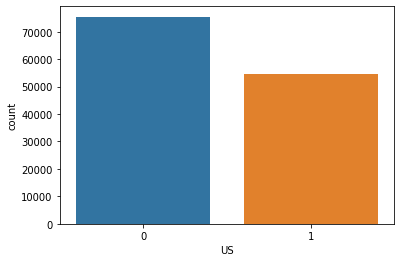

In [29]:
#Display the number of wine reviews from the US and rest of the world
sns.countplot(x='US', data=wine_scores)

In [132]:
# wine_scores = wine_scores.drop(['country','description','province','title','variety','winery'],axis=1)



In [133]:
# wine_scores = wine_scores.drop([0,2])

In [248]:
# wine_scores = wine_scores.dropna()
wine_scores.dtypes

country                  category
description                object
designation                object
points                      int64
price                     float64
province                   object
region_1                   object
region_2                   object
taster_name                object
taster_twitter_handle      object
title                      object
variety                  category
winery                     object
country code                 int8
varietal code               int16
US                          int32
vintage                   float64
dtype: object

In [342]:
#Prepare data for model insertion

X = wine_scores[['points','price','varietal code','country code']]
y = wine_scores['US']

In [343]:
#import train test split

from sklearn.model_selection import train_test_split

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [345]:
#Import Logistic Regression model

from sklearn.linear_model import LogisticRegression

In [346]:
logmodel = LogisticRegression()

In [347]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [348]:
predictions = logmodel.predict(X_test)

In [349]:
#Import library to evaluate the model

from sklearn.metrics import classification_report

In [350]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22636
           1       1.00      1.00      1.00     16356

    accuracy                           1.00     38992
   macro avg       1.00      1.00      1.00     38992
weighted avg       1.00      1.00      1.00     38992



In [351]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, predictions)

NameError: name 'confusion_matrix' is not defined

#Conclusion

### The model has a 100% accuracy rate (hmm...)

### Out of 22,636 wines, the model predicted 22,576 wines as being from the U.S. 

### Out of 16,356 wines, the model predicted 16,356 wines as not being from the U.S.